In [2]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 10.8MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [3]:
!pip install fastbook --upgrade

     |████████████████████████████████| 727kB 10.8MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 1.2MB 13.5MB/s 


In [4]:
from fastai.vision.all import *
from fastbook import * # needed for widgets

In [3]:
# Download Oxford-IIIT Pet Dataset
path = untar_data(URLs.PETS)/'images'

In [4]:
# Viewing data
path.ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_38.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_165.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_200.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_21.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_56.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_13.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_81.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_151.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_162.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_142.jpg')...]

In [5]:
def is_cat(x):
    return x[0].isupper()

In [6]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [8]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.180735,0.023171,0.006089,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.044691,0.037447,0.006766,00:49


In [19]:
uploader = widgets.FileUpload()
uploader # upload picture of cat

FileUpload(value={}, description='Upload')

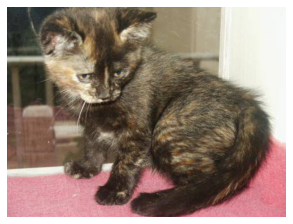

In [20]:
img = PILImage.create(uploader.data[0])
img.show()

In [21]:
is_cat, _, probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.998878


In [22]:
uploader2 = widgets.FileUpload()
uploader2 # upload picture of dog...

FileUpload(value={}, description='Upload')

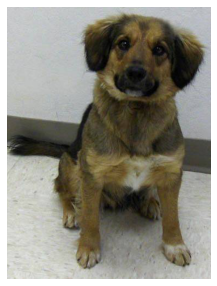

In [23]:
img2 = PILImage.create(uploader2.data[0])
img2.show()

In [24]:
is_cat, _, probs = learn.predict(img2)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000000


# Deep Learning is not just for Image Classification

## Image Segmentation

In [5]:
path = untar_data(URLs.CAMVID_TINY)

In [6]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

In [16]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,time
0,3.090994,2.484982,00:01


epoch,train_loss,valid_loss,time
0,2.000100,1.658488,00:01
1,1.713231,1.384039,00:01
2,1.526059,1.039825,00:01
3,1.381867,0.995238,00:01
4,1.255469,0.842434,00:01
5,1.132960,0.770264,00:01
6,1.032430,0.746970,00:01
7,0.954927,0.744835,00:01


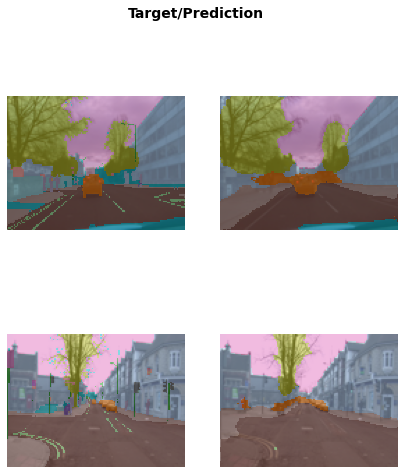

In [17]:
learn.show_results(max_n=6, figsize=(7,8))

## NLP (sentiment analysis)

In [18]:
from fastai.text.all import *

In [19]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

In [20]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.466736,0.394043,0.825120,02:28


epoch,train_loss,valid_loss,accuracy,time
0,0.307122,0.244612,0.902680,04:24
1,0.234245,0.222372,0.909600,04:25
2,0.186861,0.197642,0.925440,04:25
3,0.150575,0.194932,0.928000,04:24


In [21]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([2.0974e-05, 9.9998e-01]))

In [22]:
learn.predict("A Hindi film that is unafraid to say what it has to say in this present repressive atmosphere is rare. This is fearless, energetic filmmaking at its best.")

('pos', tensor(1), tensor([0.0011, 0.9989]))

## Tabular

In [28]:
from fastai.tabular.all import *

In [29]:
path = untar_data(URLs.ADULT_SAMPLE)

In [31]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
                         cat_names = ['workclass', 'education', 
                                      'marital-status', 'occupation', 
                                      'relationship', 'race'],
                         cont_names = ['age', 'fnlwgt', 'education-num'],
                         procs=[Categorify, FillMissing, Normalize])

In [32]:
learn = tabular_learner(dls, metrics=accuracy)

In [33]:
# fit one cycle is used for training fastai models from scratch
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.364162,0.368407,0.832924,00:07
1,0.352814,0.352320,0.839988,00:07
2,0.343581,0.349042,0.842291,00:07


## Collaborative Filtering

In [34]:
from fastai.collab import *

In [35]:
path = untar_data(URLs.ML_SAMPLE)

In [36]:
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

In [37]:
learn = collab_learner(dls, y_range=((0.5, 5.5)))

In [38]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.499154,1.471563,00:00


epoch,train_loss,valid_loss,time
0,1.346752,1.409561,00:00
1,1.255398,1.223532,00:00
2,1.022079,0.902565,00:00
3,0.793494,0.753416,00:00
4,0.688598,0.713318,00:00
5,0.645207,0.700127,00:00
6,0.629469,0.694872,00:00
7,0.619087,0.691273,00:00
8,0.608100,0.690217,00:00
9,0.607790,0.689963,00:00


In [40]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,38.0,29.0,5.0,4.592149
1,47.0,54.0,4.5,4.524018
2,80.0,37.0,1.0,3.545935
3,65.0,42.0,2.0,3.471181
4,37.0,27.0,3.0,3.787817
5,35.0,50.0,3.5,3.040643
6,100.0,86.0,5.0,3.887926
7,74.0,5.0,3.0,3.647520
8,4.0,30.0,2.5,3.084392
